In [1061]:
import psycopg2
import pandas as pd
import numpy as np


conn = psycopg2.connect(
    host="0.0.0.0",
    database="mydb",
    user="sammam",
    password="mysecretpassword"
)

In [1062]:
sql_query = "SELECT * FROM car_details INNER JOIN emission_standard ON car_details.stnd = emission_standard.stnd"

df = pd.read_sql(sql_query, conn)

conn.close()

/var/folders/6g/4zq1d985075_7_l6gxj2n81m0000gn/T/ipykernel_4604/808618032.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql_query, conn)


In [1063]:
df.columns

Index(['underhood_id', 'stnd', 'model', 'disp', 'cyl', 'trans', 'drive',
       'fuel', 'veh_class', 'air_pollution_score', 'city_mpg',
       'city_mpg_alternate', 'hwy_mpg', 'hwy_mpg_alternate', 'cmb_mpg',
       'cmb_mpg_alternate', 'greenhouse_gas_score', 'smart_way', 'comb_co2',
       'comb_co2_alternate', 'stnd', 'cert_region', 'stnd_description'],
      dtype='object')

Preprocessing

In [1064]:

df = df.drop(columns=['underhood_id', 'stnd_description', 'stnd', 'model'])


In [1065]:

# def remove_outliers(df, cols):

#     cols = ['disp', 'cyl', 'greenhouse_gas_score']

#     for col in cols:
#         quartiles = df[col].quantile([0.20, 0.80])
#         q1 = quartiles.loc[0.20]
#         q3 = quartiles.loc[0.80]

#         low_bound = q1 - 1.5 * (q3 - q1)
#         upp_bound = q3 + 1.5 * (q3 - q1)

#         df = df[(df[col] >= low_bound) & (df[col] <= upp_bound)]

#     return df


# df = remove_outliers(df, cols)

In [1066]:
from sklearn.preprocessing import LabelEncoder
print(df.columns)

def label_encode_columns(df, column_names):

    df_encoded = df.copy()
    encoder = LabelEncoder()

    for col in column_names:
        if col in df_encoded.columns:
            df_encoded[col] = encoder.fit_transform(df_encoded[col])
    return df_encoded

cate_cols = ['model', 'trans', 'drive', 'fuel', 'veh_class', 'smart_way', 'cert_region']

df = label_encode_columns(df, cate_cols)

Index(['disp', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'city_mpg_alternate', 'hwy_mpg',
       'hwy_mpg_alternate', 'cmb_mpg', 'cmb_mpg_alternate',
       'greenhouse_gas_score', 'smart_way', 'comb_co2', 'comb_co2_alternate',
       'cert_region'],
      dtype='object')


In [1067]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X = df.drop(columns=['comb_co2', 'comb_co2_alternate'])
y = df[['comb_co2', 'comb_co2_alternate']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

model = RandomForestRegressor(n_estimators = 30, max_features = 'sqrt', max_depth = 24, random_state = 42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = mse**.5
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

Mean Squared Error: 11.214349355768485
Root Mean Squared Error: 3.348783264973785
R-squared score: 0.9989177469565912


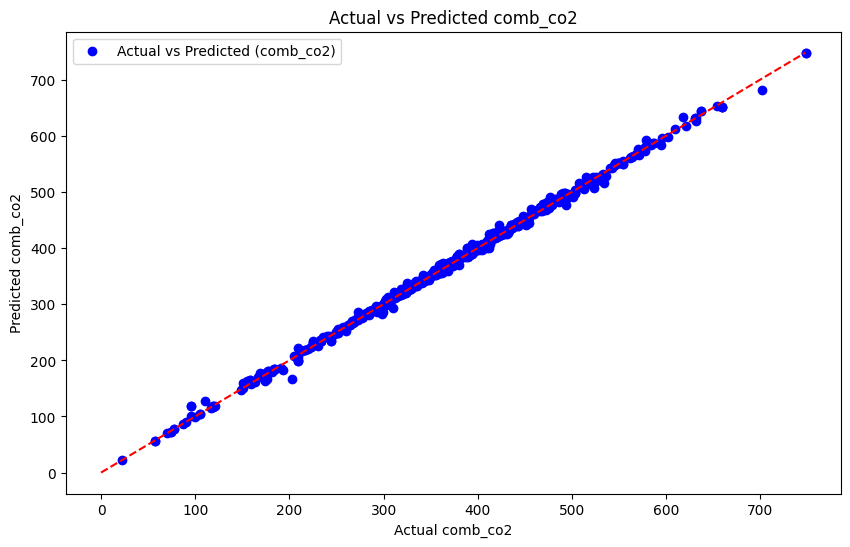

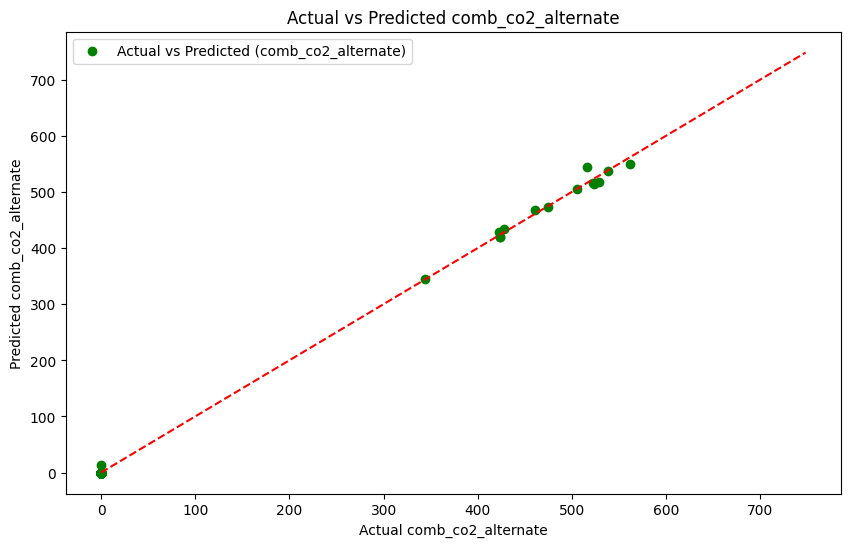

In [1068]:
import matplotlib.pyplot as plt

# Scatter plot for comb_co2
plt.figure(figsize=(10, 6))
plt.scatter(y_test['comb_co2'], y_pred[:, 0], color='blue', label='Actual vs Predicted (comb_co2)')
plt.plot([y_test.min().min(), y_test.max().max()], [y_test.min().min(), y_test.max().max()], color='red', linestyle='--')
plt.xlabel('Actual comb_co2')
plt.ylabel('Predicted comb_co2')
plt.title('Actual vs Predicted comb_co2')
plt.legend()
plt.show()

# Scatter plot for comb_co2_alternate
plt.figure(figsize=(10, 6))
plt.scatter(y_test['comb_co2_alternate'], y_pred[:, 1], color='green', label='Actual vs Predicted (comb_co2_alternate)')
plt.plot([y_test.min().min(), y_test.max().max()], [y_test.min().min(), y_test.max().max()], color='red', linestyle='--')
plt.xlabel('Actual comb_co2_alternate')
plt.ylabel('Predicted comb_co2_alternate')
plt.title('Actual vs Predicted comb_co2_alternate')
plt.legend()
plt.show()
